# Credit card fraud detection using Deep Neural Networks
*****

- Based on KERAS example: https://keras.io/examples/structured_data/imbalanced_classification/

In [1]:
'''
Needed libraries
'''
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# Data
*****
- Download data from [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).
- It contains transactions made by credit cards in September 2013 by European cardholders. 
- It presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- It contains only numerical input variables which are the result of a PCA transformation. 
- Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. - - The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
path = "/Users/rpezoa/Library/Mobile Documents/com~apple~CloudDocs/Research/imbalanced-class/data/"
df = pd.read_csv(path + "creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
values = df["Class"].value_counts()
print(values)

0    284315
1       492
Name: Class, dtype: int64


## Training, testing

In [4]:
y = df["Class"]
y = y.astype(int)
X = df.iloc[:,1:-1]

In [5]:
print(X.shape, y.shape)

(284807, 29) (284807,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, 
                                                  test_size=0.2, random_state=0)
n_classes = 2


In [7]:
counts = np.bincount(y_train.values)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

print("Weight class 0: ", weight_for_0,6)
print("Weight class 1: ", weight_for_1)

Number of positive samples in training data: 281 (0.18% of total)
Weight class 0:  6.281012499214874e-06 6
Weight class 1:  0.0035587188612099642


# Binary crossentropy

In [8]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
import tensorflow  as tf



model = Sequential()
model.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(150, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))

metrics_m = [
    tf.keras.metrics.FalseNegatives(name="fn"),
    tf.keras.metrics.FalsePositives(name="fp"),
    tf.keras.metrics.TrueNegatives(name="tn"),
    tf.keras.metrics.TruePositives(name="tp"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
]

model.compile(optimizer=SGD(),
               loss='binary_crossentropy',
               metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

history = model.fit(X_train, y_train, epochs=5, 
                    verbose=1,
                    validation_data = (X_val, y_val))


Epoch 1/5
4985/4985 [==============================] - 12s 2ms/step - loss: 0.0661 - accuracy: 0.9982 - precision: 0.3339 - recall: 0.0372 - val_loss: 0.0430 - val_accuracy: 0.9981 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
4985/4985 [==============================] - 14s 3ms/step - loss: 0.0309 - accuracy: 0.9981 - precision: 0.5228 - recall: 0.0134 - val_loss: 0.0136 - val_accuracy: 0.9982 - val_precision: 1.0000 - val_recall: 0.0533
Epoch 3/5
4985/4985 [==============================] - 10s 2ms/step - loss: 0.0135 - accuracy: 0.9985 - precision: 0.8778 - recall: 0.2011 - val_loss: 0.0180 - val_accuracy: 0.9984 - val_precision: 0.8333 - val_recall: 0.2000
Epoch 4/5
4985/4985 [==============================] - 10s 2ms/step - loss: 0.0154 - accuracy: 0.9986 - precision: 0.8512 - recall: 0.2789 - val_loss: 0.0081 - val_accuracy: 0.9986 - val_precision: 0.8889 - val_recall: 0.3200
Epoch 5/5
4985/4985 [==============================] - 11s 2ms/step - loss: 0.0066 - acc

In [9]:
def show_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure()
    plt.plot(train_loss,'r', label="train")
    plt.plot(val_loss,'g', label="validation")
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
def show_metrics(y_pred,th):
    cm = confusion_matrix(y_test, y_pred>th)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    d = classification_report(y_test, y_pred > th,output_dict=True)
    display(pd.DataFrame.from_dict(d))
    return y_pred

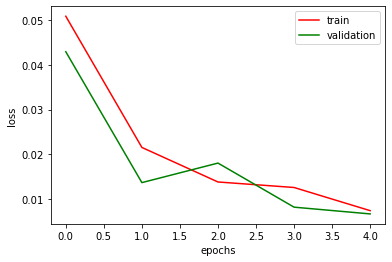

In [10]:
show_history(history)

[[85300     7]
 [   74    62]]


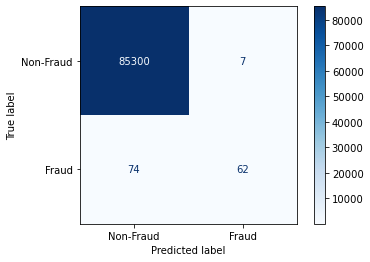

,0,1,accuracy,macro avg,weighted avg
precision,0.999133,0.898551,0.999052,0.948842,0.998973
recall,0.999918,0.455882,0.999052,0.727900,0.999052
f1-score,0.999525,0.604878,0.999052,0.802202,0.998897
support,85307.000000,136.000000,0.999052,85443.000000,85443.000000


array([[7.7790171e-02],
       [4.0024519e-04],
       [3.4084916e-04],
       ...,
       [9.3102455e-04],
       [1.2087329e-05],
       [2.0986795e-04]], dtype=float32)

In [11]:
y_pred = model.predict(X_test)
show_metrics(y_pred,.5)

In [12]:
y_pred

array([[7.7790171e-02],
       [4.0024519e-04],
       [3.4084916e-04],
       ...,
       [9.3102455e-04],
       [1.2087329e-05],
       [2.0986795e-04]], dtype=float32)

## Custom Loss function: Focal loss

In [13]:
from tensorflow import  constant, clip_by_value, math
from tensorflow.keras.backend import mean, epsilon, cast,  pow
from tensorflow import nn
import tensorflow as tf
import tensorflow_addons as tfa

def get_focal_loss(y_true, y_pred, alpha, gamma):
    # Cast y_true from into to float
    y_true = cast(y_true, 'float32')
    epsilon_ = constant(epsilon(), y_pred.dtype.base_dtype)
    y_pred = clip_by_value(y_pred, epsilon_, 1. - epsilon_)

    fl = -alpha* y_true * math.log(y_pred + epsilon()) * (1 - y_pred)**gamma
    fl += -(1-alpha)*(1 - y_true) * math.log(1 - y_pred + epsilon()) * (y_pred)**gamma
    return tf.reduce_mean(fl, axis=-1)


def focal_loss(alpha, gamma, version=1):
    return lambda y_true, y_pred : get_focal_loss(y_true, y_pred, alpha, gamma)


In [14]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
import tensorflow  as tf

model = Sequential()
model.add(Dense(300, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(150, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))

metrics_m = [
    tf.keras.metrics.FalseNegatives(name="fn"),
    tf.keras.metrics.FalsePositives(name="fp"),
    tf.keras.metrics.TrueNegatives(name="tn"),
    tf.keras.metrics.TruePositives(name="tp"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
]

model.compile(optimizer=SGD(),
               loss=focal_loss(0.25,2),
               metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

history = model.fit(X_train, y_train, epochs=5, 
                    verbose=1,
                    validation_data = (X_val, y_val))

Epoch 1/5
4985/4985 [==============================] - 12s 2ms/step - loss: 0.0087 - accuracy: 0.9970 - precision_1: 0.0302 - recall_1: 0.0231 - val_loss: 0.0039 - val_accuracy: 0.9982 - val_precision_1: 1.0000 - val_recall_1: 0.0267
Epoch 2/5
4985/4985 [==============================] - 10s 2ms/step - loss: 0.0040 - accuracy: 0.9982 - precision_1: 0.8959 - recall_1: 0.0706 - val_loss: 0.0036 - val_accuracy: 0.9985 - val_precision_1: 0.8947 - val_recall_1: 0.2267
Epoch 3/5
4985/4985 [==============================] - 10s 2ms/step - loss: 0.0038 - accuracy: 0.9986 - precision_1: 0.8696 - recall_1: 0.2299 - val_loss: 0.0030 - val_accuracy: 0.9987 - val_precision_1: 0.8750 - val_recall_1: 0.3733
Epoch 4/5
4985/4985 [==============================] - 10s 2ms/step - loss: 0.0025 - accuracy: 0.9989 - precision_1: 0.8535 - recall_1: 0.4175 - val_loss: 0.0019 - val_accuracy: 0.9988 - val_precision_1: 0.8293 - val_recall_1: 0.4533
Epoch 5/5
4985/4985 [==============================] - 11s 2ms/s

[[85305     2]
 [  107    29]]


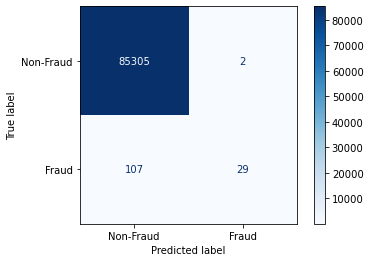

,0,1,accuracy,macro avg,weighted avg
precision,0.998747,0.935484,0.998724,0.967116,0.998647
recall,0.999977,0.213235,0.998724,0.606606,0.998724
f1-score,0.999362,0.347305,0.998724,0.673333,0.998324
support,85307.000000,136.000000,0.998724,85443.000000,85443.000000


array([[4.2781122e-12],
       [5.4757823e-25],
       [1.3321340e-02],
       ...,
       [2.8866026e-10],
       [7.5231254e-02],
       [5.5999011e-02]], dtype=float32)

In [15]:
y_pred = model.predict(X_test)
show_metrics(y_pred,.5)

In [16]:
y_pred

array([[4.2781122e-12],
       [5.4757823e-25],
       [1.3321340e-02],
       ...,
       [2.8866026e-10],
       [7.5231254e-02],
       [5.5999011e-02]], dtype=float32)

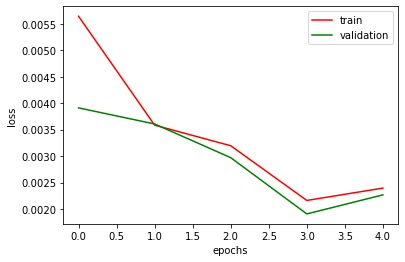

In [17]:
show_history(history)